# Data Exploring

In diesem Notebook wird der Datensatz `data/player_match_statistics.feather` aus `src/1-data-aquisition.ipynb` genauer untersucht und basierend auf diesen Ergebnissen weiterhin angepasst und gecleaned.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_feather("../data/1b-player_match_statistics.feather")
df

,Map,Region,Rounds,Winner,Premade,Score,Score First Half,Score Second Half,Score Overtime,Nickname,...,Deaths,Headshots,Headshot Ratio,K/D Ratio,K/R Ratio,Kills,MVPs,Ace,Quad Kills,Triple Kills
0,de_dust2,EU,10,True,False,9,7,2,0,ForceHunterX,...,2,10,0.62,8.00,1.60,16,4,0,1,0
1,de_dust2,EU,10,True,False,9,7,2,0,R_SaitamaTV,...,4,1,0.20,1.25,0.50,5,1,0,0,1
2,de_dust2,EU,10,True,False,9,7,2,0,kubinatorLSD,...,2,4,0.40,5.00,1.00,10,3,0,0,1
3,de_dust2,EU,10,True,False,9,7,2,0,_mhN,...,5,6,0.75,1.60,0.80,8,1,0,0,0
4,de_dust2,EU,10,True,False,9,7,2,0,RUcKeTa,...,3,4,0.40,3.33,1.00,10,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272214,de_mirage,SA,19,True,False,16,12,4,0,max_-,...,10,7,0.37,1.90,1.00,19,6,0,0,3
272215,de_mirage,SA,19,True,False,16,12,4,0,brnz4n,...,9,13,0.57,2.56,1.21,23,3,0,0,2
272216,de_mirage,SA,19,True,False,16,12,4,0,allen-_-,...,7,6,0.67,1.29,0.47,9,2,0,0,1
272217,de_mirage,SA,19,True,False,16,12,4,0,Timothyo,...,11,6,0.25,2.18,1.26,24,5,0,1,2


## Daten-Features

Der Datensatz besteht aus 23 Features:

- `Map            (category)` Karte auf der gespielt wurde. Counter-Strike besitzt eine Reihe an selbst-entwickelten 3D Umgebungen in welchen die Spieler spielen können. Neben den selbst-entwickelten Maps können Community-Mitglieder eigene entwickeln, teilen und bespielen.
- `Region         (category)` Kontinent / Geographische Region aus welchen ein Spieler stammt. Um Latenzen gering zu halten stehen auf allen Kontinenten eigene Spielserver.
- `Rounds            (int64)` Anzahl an Runden die gespielt wurde (CSGO-Rounds, _nicht_ FACEIT-Rounds, unterschied wird im ersten Notebook erklärt).
- `Winner             (bool)` Ob das Team des Spielers das Spiel (FACEIT-Rounds) gewonnen hat.
- `Premade            (bool)` Ob das Team des Spielers sich schon vor dem Spiel gekannt hat und sich vermutlich entsprechend besser absprechen und kommunizieren können.
- `Score             (int64)` Anzahl an gewonnenden Runden (CSGO-Rounds).
- `Score First Half  (int64)` Anzahl an gewonnenden Runden in der ersten Halbzeit (CSGO-Rounds).
- `Score Second Half (int64)` Anzahl an gewonnenden Runden in der zweiten Halbzeit (CSGO-Rounds).
- `Score Overtime    (int64)` Anzahl an gewonnenden Runden in der Verlängerung (CSGO-Rounds).
- `Nickname         (object)` Selbstgewählter Spielername.
- `Player ID        (object)` FACEIT User-ID.
- `Professional       (bool)` Ob der Spieler (laut Ground-Truth) professionell spielt.
- `Assists           (int64)` Wie viele Abschuss-Hilfen der Spieler in dem Spiel gemacht hat. Einen Assist gibt es ab 40% Schaden an einem gegnerischem Spieler.
- `Deaths            (int64)` Wie oft der Spieler gestorben ist.
- `Headshots         (int64)` Wie oft der Spieler einen Gegner mit einem Kopfschuss getötet hat. Kopfschüsse sind schwieriger zu treffen, machen dafür jedoch signifikant mehr schaden.
- `Headshot Ratio  (float64)` Prozentualer Anteil an Kopfschuss-Tötungen im Vergleich zu allen Abschüssen.
- `K/D Ratio       (float64)` Prozentualer Anteil an Abschüssen zu Toden.
- `K/R Ratio       (float64)` Prozentualer Anteil an Abschüssen zu Runden (CSGO-Rounds).
- `Kills             (int64)` Anzahl an Abschüssen des Spielers.
- `MVPs              (int64)` Anzahl an MVPs. MVP (Most Valuable Rlayer) wird nach jeder Runde (CSGO-Round) vom Spiel anhand diverser Statistiken bestimmt.
- `Ace               (int64)` Anzahl an Aces des Spielers. Ein Spieler kann ein Ace machen, in dem er alle fünf gegnerischen Spieler tötet, somit also einen Fünfer-Kill macht.
- `Quad Kills        (int64)` Anzahl an Quad Kills. Ähnlich wie Ace, nur mit vier Abschüssen anstelle der maximalen Anzahl fünf.
- `Triple Kills      (int64)` Anzahl an Triple Kills. Gleich wie Quad Kills, nur mit drei anstelle von vier Abschüssen.

In [3]:
df['Map'] = df['Map'].astype('category')
df['Region'] = df['Region'].astype('category')
df.dtypes

Map                  category
Region               category
Rounds                  int64
Winner                   bool
Premade                  bool
Score                   int64
Score First Half        int64
Score Second Half       int64
Score Overtime          int64
Nickname               object
Player ID              object
Professional             bool
Assists                 int64
Deaths                  int64
Headshots               int64
Headshot Ratio        float64
K/D Ratio             float64
K/R Ratio             float64
Kills                   int64
MVPs                    int64
Ace                     int64
Quad Kills              int64
Triple Kills            int64
dtype: object

## Data Cleaning

In [4]:
df.describe()

,Rounds,Score,Score First Half,Score Second Half,Score Overtime,Assists,Deaths,Headshots,Headshot Ratio,K/D Ratio,K/R Ratio,Kills,MVPs,Ace,Quad Kills,Triple Kills
count,272219.000000,272219.000000,272219.000000,272219.000000,272219.000000,272219.000000,272219.000000,272219.000000,272219.000000,272219.000000,272219.000000,272219.000000,272219.000000,272219.000000,272219.000000,272219.000000
mean,26.721155,13.368883,7.495079,5.463770,0.410034,3.325231,18.784019,9.041143,0.485781,1.080533,0.700930,18.739809,2.681389,0.023011,0.208806,1.026354
std,5.300303,4.405379,2.852332,2.810193,1.473736,2.045774,4.885496,4.303122,0.158668,0.631450,0.227783,6.928421,1.830898,0.152754,0.471270,1.083097
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.600000,-0.760000,-15.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,11.000000,6.000000,3.000000,0.000000,2.000000,16.000000,6.000000,0.380000,0.730000,0.550000,14.000000,1.000000,0.000000,0.000000,0.000000
50%,27.000000,16.000000,7.000000,6.000000,0.000000,3.000000,19.000000,9.000000,0.500000,1.000000,0.690000,18.000000,2.000000,0.000000,0.000000,1.000000
75%,29.000000,16.000000,9.000000,7.000000,0.000000,5.000000,21.000000,12.000000,0.590000,1.290000,0.840000,23.000000,4.000000,0.000000,0.000000,2.000000
max,72.000000,37.000000,15.000000,15.000000,22.000000,19.000000,64.000000,49.000000,2.000000,23.000000,2.160000,90.000000,19.000000,3.000000,6.000000,10.000000


In [5]:
sum(df.isna().sum())

0

Der Datensatz ist sehr rein, da es keine `NULL` oder `NaN` Werte in ihm gibt. Betrachtet man die Durchschnitt- und Extrema-Werte an so zeigt sich bis auf wenige Ausnahmen auch die sehr gute Konsistenz der Daten. Abschuss-bezogene Features (`K/D`, `K/R`, `Kills`, `Headshot Ratio`) weisen teils negative Minimalwerte auf. An sich inkonsistent und unlogisch, wie soll ein Spieler negative Abschüsse haben können? In CSGO ist das jedoch durchaus möglich, indem ein Spieler entweder sich selbst oder einen Mitspieler, sei es aus Versehen oder aus Absicht, tötet bekommt dieser einen Kill abzug. Wenn besagter Spieler im Spiel keinen einzigen Abschuss zustande bringt, bleibt am Ende des Spiels eine negative Anzahl an Kills. Somit ist der Datensatz weiterhin konsistent. In der Praxis entstehen solche Ausreißer jedoch meist mit Absicht, dann ist vom sogenanntem "Trolling" die Rede. Daher werden im Folgenden solche Ausreißer entfernt. Ebenso werden Spiele mit einer sehr großen Anzahl an gespielten Runden (CSGO-Rounds) entfernt, da auch diese meist eine Ausnahme darstellen und entweder durch Absprache der Teams enstanden sind oder beide Teams schlichtweg gleichgut gespielt haben. Auch solche Spiele sind entsprechend über einen Spieler wenig Aussagekräftig. Als Grenzwert für die maximale Anzahl an Runden wird die Länge eines Spiels mit zweifacher Verlängerung, also `30+2*6 = 42` Runden angenommen. Insgesamt werden dadurch `272219-267250 = 4969` Einträge aus dem Datensatz entfernt.

In [6]:
df = df[df["Kills"] >= 0]
df = df[df["Rounds"] < 42]
df.describe()

,Rounds,Score,Score First Half,Score Second Half,Score Overtime,Assists,Deaths,Headshots,Headshot Ratio,K/D Ratio,K/R Ratio,Kills,MVPs,Ace,Quad Kills,Triple Kills
count,267250.000000,267250.000000,267250.000000,267250.000000,267250.000000,267250.000000,267250.000000,267250.000000,267250.000000,267250.000000,267250.000000,267250.000000,267250.000000,267250.000000,267250.000000,267250.000000
mean,26.371057,13.194051,7.495113,5.426144,0.272793,3.282608,18.532490,8.940625,0.486496,1.081873,0.700867,18.490152,2.646451,0.022788,0.206514,1.012520
std,4.629493,4.235707,2.866829,2.810433,1.018907,2.007422,4.517833,4.204037,0.158819,0.635930,0.228631,6.639379,1.805365,0.152058,0.468277,1.071703
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,10.000000,5.000000,3.000000,0.000000,2.000000,16.000000,6.000000,0.380000,0.720000,0.540000,14.000000,1.000000,0.000000,0.000000,0.000000
50%,26.000000,16.000000,7.000000,6.000000,0.000000,3.000000,19.000000,8.000000,0.500000,1.000000,0.690000,18.000000,2.000000,0.000000,0.000000,1.000000
75%,29.000000,16.000000,10.000000,7.000000,0.000000,4.000000,21.000000,11.000000,0.590000,1.300000,0.840000,23.000000,4.000000,0.000000,0.000000,2.000000
max,41.000000,22.000000,15.000000,15.000000,7.000000,18.000000,38.000000,38.000000,2.000000,23.000000,2.160000,61.000000,19.000000,3.000000,6.000000,10.000000


## Korrelation zum `Professional` Attribut

In [7]:
df.corr()["Professional"].sort_values()

Deaths              -0.102429
Score Overtime       0.009896
Assists              0.014456
Rounds               0.018986
Ace                  0.025856
Headshot Ratio       0.029018
Score Second Half    0.056881
Quad Kills           0.060359
Triple Kills         0.090454
Winner               0.093198
Score First Half     0.094148
Score                0.103844
Headshots            0.126432
Kills                0.133888
MVPs                 0.139274
K/R Ratio            0.147231
K/D Ratio            0.149906
Premade              0.216759
Professional         1.000000
Name: Professional, dtype: float64

Die Korrelation des Datensatzes bezogen auf das `Professional` Attribut zeigt deutliche Unterschiede zwischen professionellen Spieler und normalen Spielern auf. Besonders hervorstechend ist das `Premade` Attribut. Es könnte entsprechend abgeleitet werden, dass professionelle Spieler häufiger mit schon bekannten Mitspielern zusammenspielen als sich vom Spiel zufällig Mitspieler zuweisen zu lassen. Auch alle Abschuss-bezogenen Features (`K/D`, `K/R`, `Kills`, `Headshots`) korrelieren signifikant positiv mit dem `Professional` Attribut. Logisch - Gute und Erfolgreiche Spieler machen mehr Abschüsse.

## Verähltnis zwischen Anzahl an professionellen und unprofessionellen Spielern

Der Datensatz ist unausgeglichen, jedoch nicht allzu stark. Die Anzahl an professionellen Spielern weißt mit ca. 30% einen signifikanten Teil des Datensatzes auf. Dies könnte sich sehr gut auf die Trennschärfe von Algorithmen auf den Datensatz auswirken, jedoch stellt dieses Verhältnis in keinster Weise die Realität wieder. Somit weißt der Datensatz von Grundauf einen Bias auf, womit vorsichtig umzugehen ist.

<AxesSubplot:xlabel='count', ylabel='Professional'>

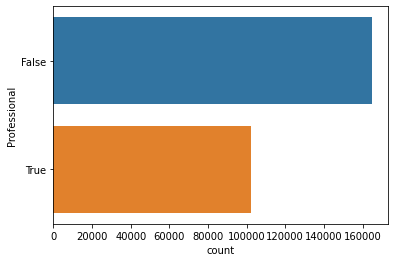

In [8]:
sns.countplot(data=df, y="Professional")

## Plausibilisierung der Daten

Durch die Darstellung der Daten als Violin Plots soll nach groben Ausreißern in den Daten sowie deutlichen Unterschieden zwischen professionellen und unprofessionellen Spielern gesucht werden können. Die dargestellten Plots zeigen teilweise starke, jedoch nicht unrealistische Ausreißer bei fast allen Features. Somit bestätigt sich die Plausibilität der Daten. Jedoch ist leider kein deutlicher Unterschied zwischen professionellen und unprofessionellen Spielern in den Daten erkennbar, die Plots ähneln sich zu stark.

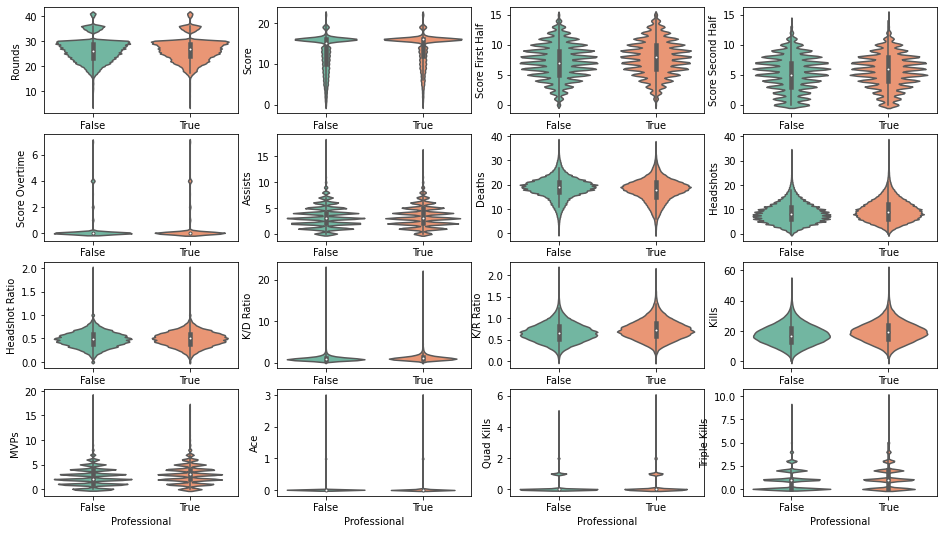

In [9]:
fig, axs = plt.subplots(4, 4, figsize=(16, 9))
for i, column in enumerate(df.select_dtypes(include='number').columns):
    ax = axs[i//4, i%4]
    sns.violinplot(y=column, x="Professional", data=df, palette="Set2", ax=ax)

## Einfluss der Kategorie-Daten-Features

Sowohl das Feature `Map` als auch das Feature `Region` ist vom Datentyp `Category`. Wie groß sind die Anteile einzelner Kategorien im Datensatz? Wie im unteren Plot zu sehen ist gibt es sehr viele Maps, welche nur sehr selten in den Daten vertreten sind. Um die Daten weniger Biased zu machen werden diese entfernt. Ähnliches gilt für die Regionen `Oceania` und `South America`, auch diese werden aus dem Datensatz entfernt.

<AxesSubplot:xlabel='count', ylabel='Map'>

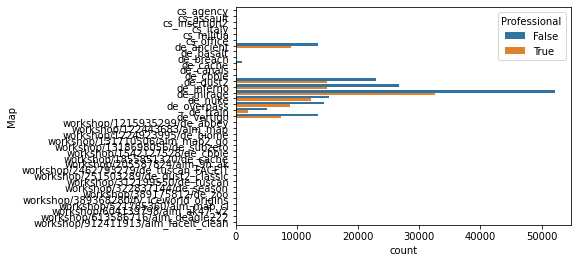

In [10]:
sns.countplot(data=df, y="Map", hue="Professional")

In [11]:
df = df[df.eval("Map in ['de_cache', 'de_dust2', 'de_inferno', 'de_mirage', 'de_nuke', 'de_overpass', 'de_train', 'de_vertigo']")].reset_index(drop=True)
df["Map"] = df["Map"].cat.remove_unused_categories()

<AxesSubplot:xlabel='count', ylabel='Region'>

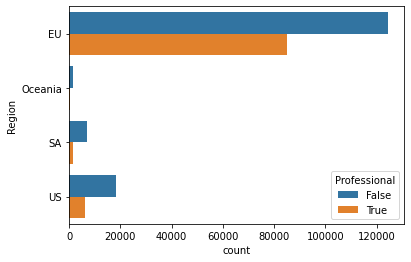

In [12]:
sns.countplot(data=df, y="Region", hue="Professional")

In [13]:
df = df[df.eval("Region in ['EU', 'US']")].reset_index(drop=True)
df["Region"] = df["Region"].cat.remove_unused_categories()

## Premade

Aus der Erfahrung zeigt sich, dass Team welche schon einmal miteinander gespielt haben und sich persönlich kennen besser spielen. Dies liegt zum einen an der Chemie zwischen den Spielern, aber auch bedeutend an der Möglichkeit zur Absprache untereinander. Solche Teams sind während dem Spiel häufig auch in Sprachkanälen wie zum Beispiel Discord oder TeamSpeak, wodurch die Kommunikation im Vergleich zum In-Game-Chat deutlich erleichtert wird. Wie der untere Plot zeigt, erkennt sich dies auch in den Daten wieder.

<AxesSubplot:xlabel='count', ylabel='Premade'>

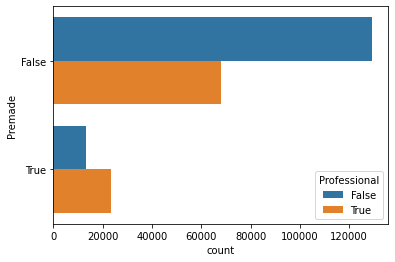

In [14]:
sns.countplot(data=df, y="Premade", hue="Professional")

Eine weitere Erkenntnis zeigt sich bei der Gegenüberstellung des `Professional` und `Premade` gegenüber den restlichen Features: Der Unterschied zwischen professionellen und unprofessionellen Spielern wird deutlich sichtbar, wenn man die Datensets in `Premade` und `Nicht-Premade` teilt. Entsprechend kann das `Premade` Feature als eins der wichtigsten Features des Datensatzes gesehen werden.

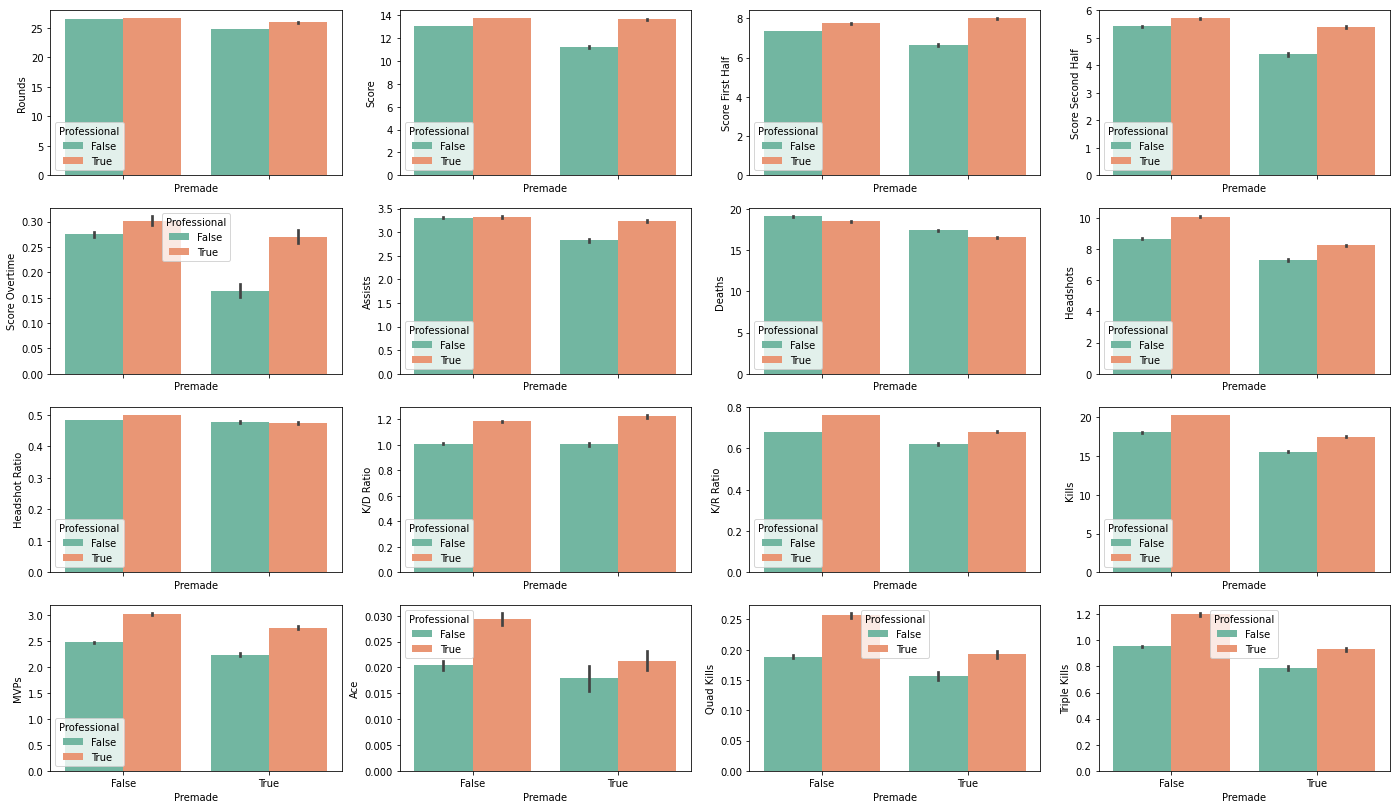

In [15]:
rows = 4
cols = 4
fig, axs = plt.subplots(4, 4, figsize=(24, 14), sharey=False, sharex=True)
for i, column in enumerate(df.select_dtypes(include='number').columns):
    ax = axs[i//rows, i%rows]
    sns.barplot(y=column, x="Premade", hue="Professional", data=df, palette="Set2", ax=ax)

## Speichern des gereinigten Datensatzes

Schlussendlich wird der gereinigte Datensatz im `Feather` Format gespeichert.

In [16]:
df.to_feather("../data/2-player_match_statistics_cleaned.feather")